In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the input data
input_data = pd.read_csv('../data/raw/train_X_beAW6y8.csv')

In [5]:
# Define the column ranges for each class (tags and categories)
tag_genres_cols = input_data.columns[1:91]  # 90 tag-genres
tag_instruments_cols = input_data.columns[91:203]  # 112 tag-instruments
tag_moods_cols = input_data.columns[203:249]  # 46 tag-moods

category_genres_cols = input_data.columns[249:267]  # 18 category-genres
category_instruments_cols = input_data.columns[267:282]  # 15 category-instruments
category_moods_cols = input_data.columns[282:290]  # 8 category-moods

# Separate the data into tags and categories for each class
genres_tags_data = input_data[['ChallengeID'] + list(tag_genres_cols)]
instruments_tags_data = input_data[['ChallengeID'] + list(tag_instruments_cols)]
moods_tags_data = input_data[['ChallengeID'] + list(tag_moods_cols)]

genres_categories_data = input_data[['ChallengeID'] + list(category_genres_cols)]
instruments_categories_data = input_data[['ChallengeID'] + list(category_instruments_cols)]
moods_categories_data = input_data[['ChallengeID'] + list(category_moods_cols)]

In [6]:
# Optionally, save the separated data into CSV files
genres_tags_data.to_csv('../data/train/input_genres_tags_data.csv', index=False)
instruments_tags_data.to_csv('../data/train/input_instruments_tags_data.csv', index=False)
moods_tags_data.to_csv('../data/train/input_moods_tags_data.csv', index=False)

genres_categories_data.to_csv('../data/train/input_genres_categories_data.csv', index=False)
instruments_categories_data.to_csv('../data/train/input_instruments_categories_data.csv', index=False)
moods_categories_data.to_csv('../data/train/input_moods_categories_data.csv', index=False)

In [7]:
# Load the output data
output_data = pd.read_csv('../data/raw/train_y_YZCqwbD.csv')

In [8]:
# Define the column ranges for each class (tags)
tag_genres_cols = output_data.columns[1:91]  # 90 tag-genres
tag_instruments_cols = output_data.columns[91:203]  # 112 tag-instruments
tag_moods_cols = output_data.columns[203:249]  # 46 tag-moods

# Separate the data into tags for each class
genres_tags_data = output_data[['ChallengeID'] + list(tag_genres_cols)]
instruments_tags_data = output_data[['ChallengeID'] + list(tag_instruments_cols)]
moods_tags_data = output_data[['ChallengeID'] + list(tag_moods_cols)]

In [9]:
# Optionally, save the separated data into CSV files
genres_tags_data.to_csv('../data/train/output_genres_tags_data.csv', index=False)
instruments_tags_data.to_csv('../data/train/output_instruments_tags_data.csv', index=False)
moods_tags_data.to_csv('../data/train/output_moods_tags_data.csv', index=False)

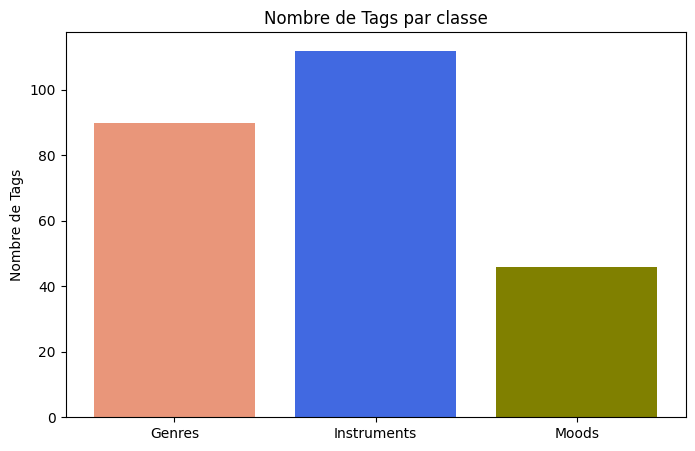

In [26]:
# Histogramme : Nombre de tags
tag_counts = {
    "Genres": len(tag_genres_cols),
    "Instruments": len(tag_instruments_cols),
    "Moods": len(tag_moods_cols),
}

plt.figure(figsize=(8, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color=['darksalmon','royalblue', 'olive'])
plt.title("Nombre de Tags par classe")
plt.ylabel("Nombre de Tags")
plt.show()

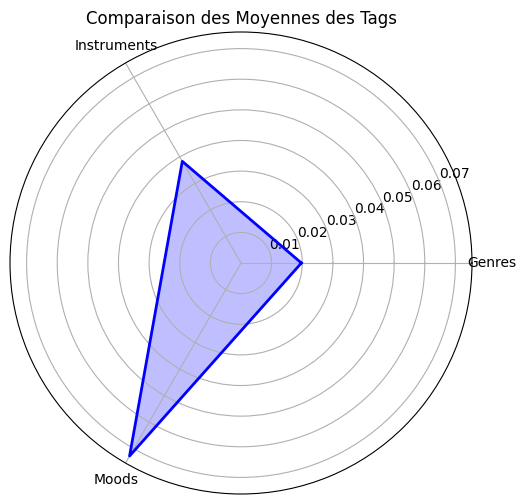

In [35]:
# Radar : Comparaison des moyennes des tags
categories = ["Genres", "Instruments", "Moods"]
averages = [
    input_data[tag_genres_cols].mean().mean(),
    input_data[tag_instruments_cols].mean().mean(),
    input_data[tag_moods_cols].mean().mean(),
]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer le radar
averages += averages[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.fill(angles, averages, color='blue', alpha=0.25)
ax.plot(angles, averages, color='blue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Comparaison des Moyennes des Tags")
plt.show()

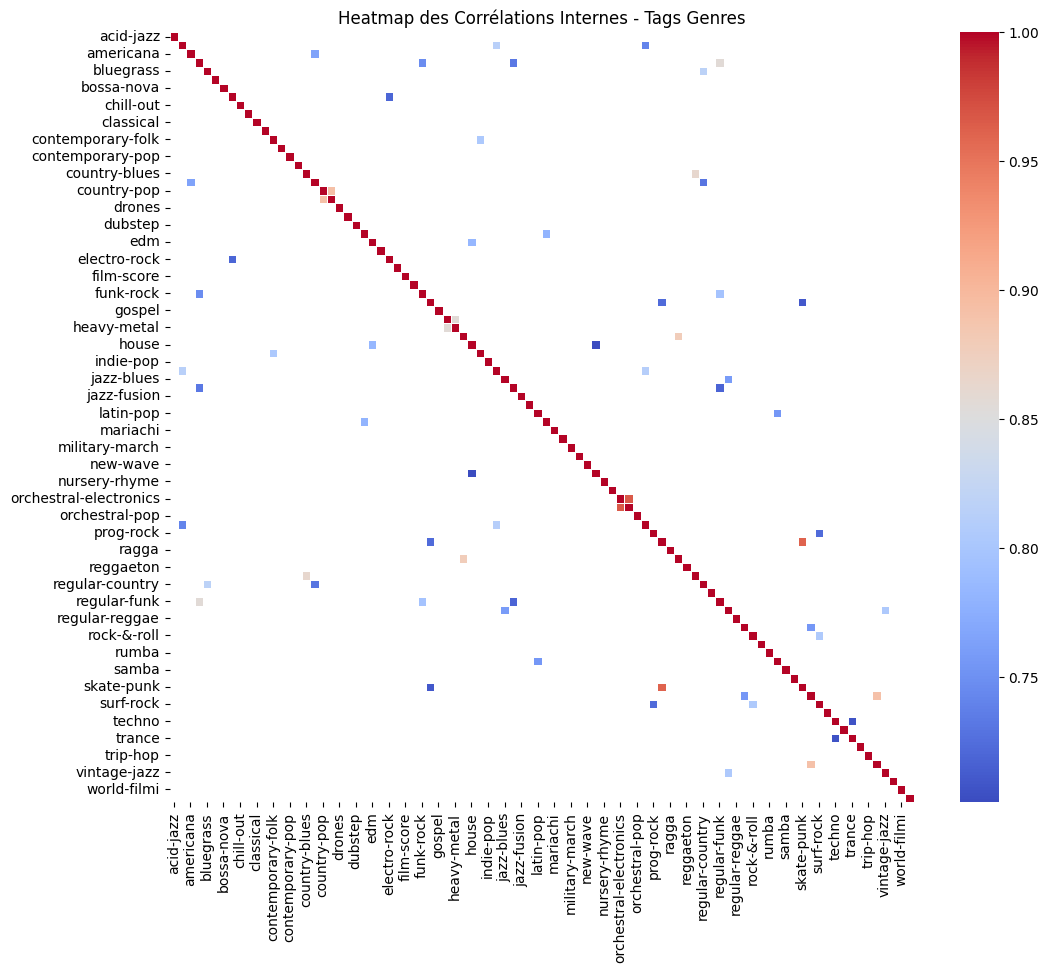

In [36]:
# Calculer la matrice de corrélation
genres_correlation = input_data[tag_genres_cols].corr()

# Filtrer les tags les plus corrélés (optionnel pour éviter une matrice trop dense)
high_corr_tags_g = genres_correlation[genres_correlation > 0.7].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    high_corr_tags_g,
    cmap="coolwarm",
    annot=False,
    cbar=True,
    linewidths=0.5,
)
plt.title("Heatmap des Corrélations Internes - Tags Genres")
plt.show()

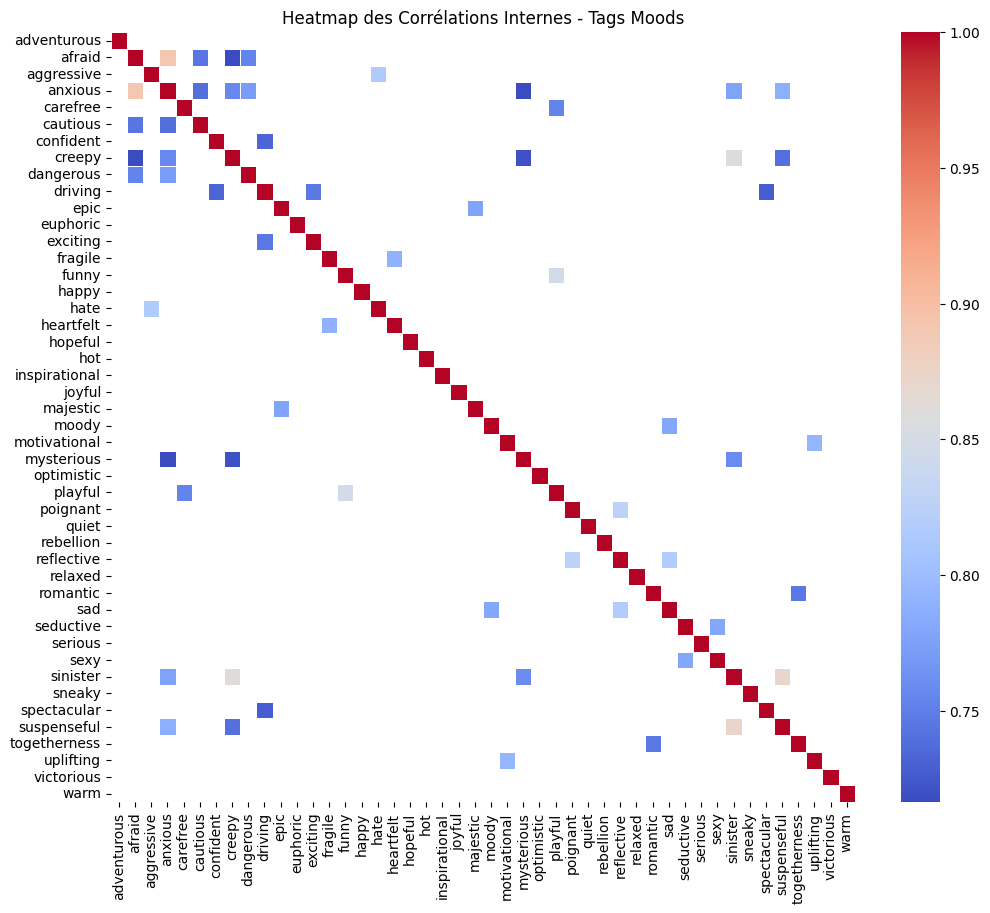

In [37]:
# Calculer la matrice de corrélation
moods_correlation = input_data[tag_moods_cols].corr()

# Filtrer les tags les plus corrélés (optionnel pour éviter une matrice trop dense)
high_corr_tags_m = moods_correlation[moods_correlation > 0.7].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    high_corr_tags_m,
    cmap="coolwarm",
    annot=False,
    cbar=True,
    linewidths=0.5,
)
plt.title("Heatmap des Corrélations Internes - Tags Moods")
plt.show()

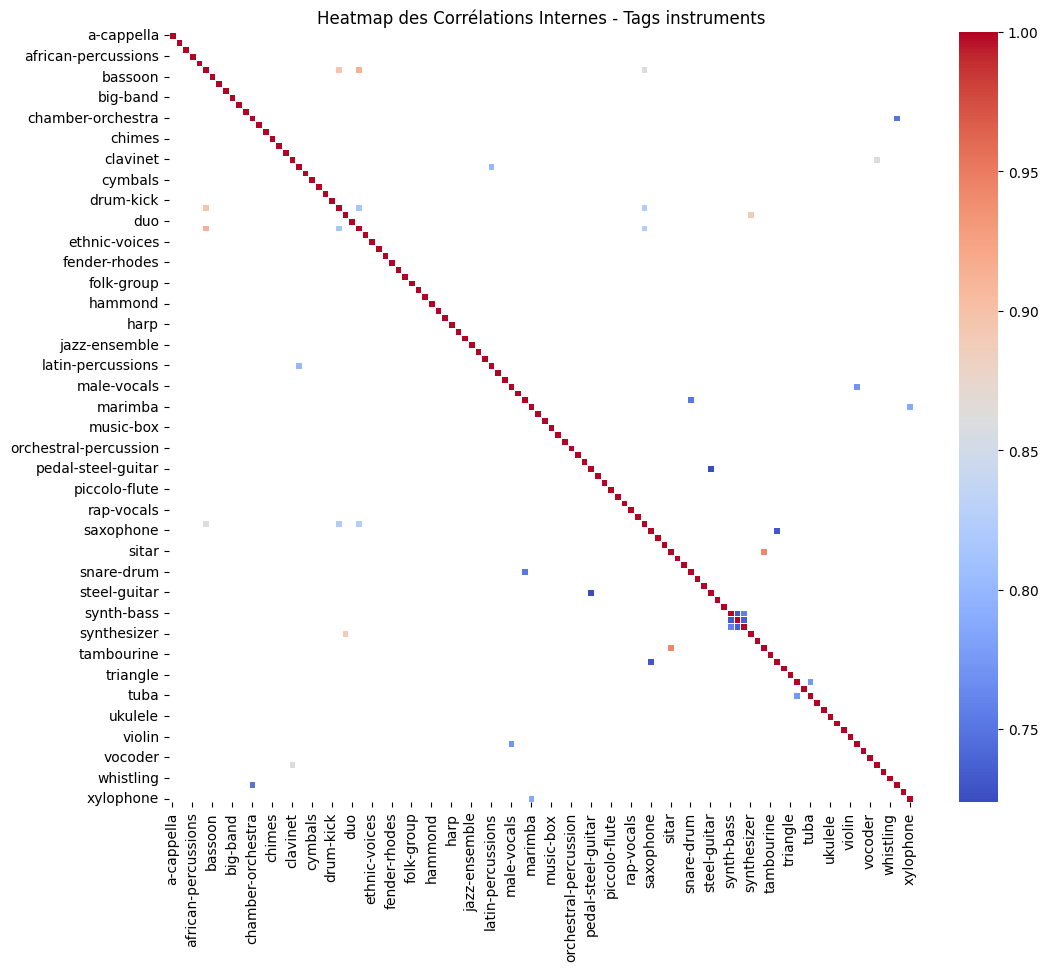

In [38]:
# Calculer la matrice de corrélation
instruments_correlation = input_data[tag_instruments_cols].corr()

# Filtrer les tags les plus corrélés (optionnel pour éviter une matrice trop dense)
high_corr_tags_i = instruments_correlation[instruments_correlation > 0.7].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    high_corr_tags_i,
    cmap="coolwarm",
    annot=False,
    cbar=True,
    linewidths=0.5,
)
plt.title("Heatmap des Corrélations Internes - Tags instruments")
plt.show()

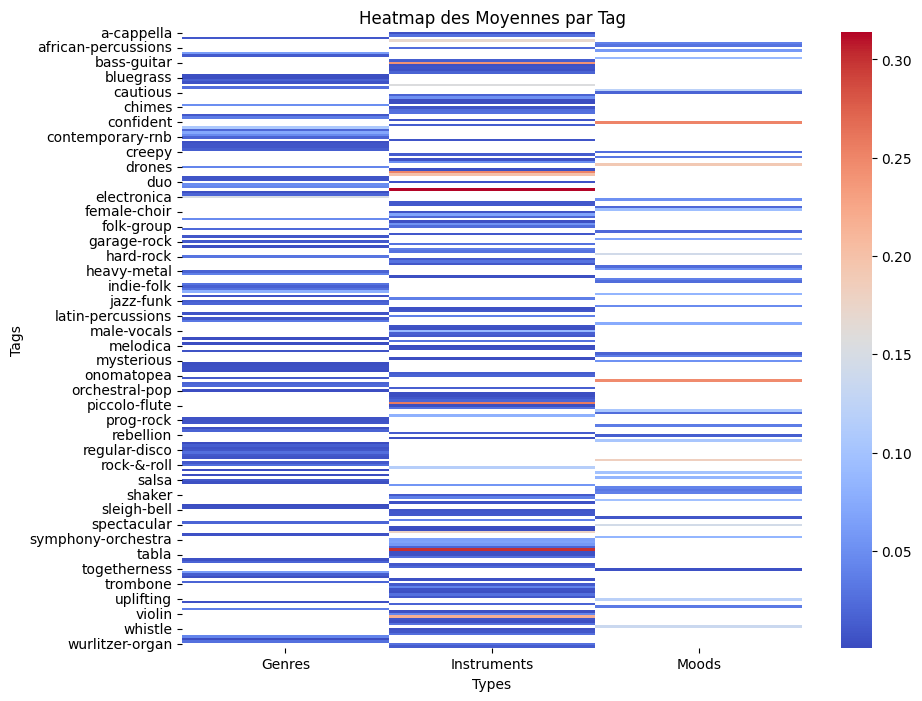

In [39]:
# Heatmap : Moyennes des catégories (genre, instruments, moods)
category_data = {
    "Genres": input_data[tag_genres_cols].mean(axis=0),
    "Instruments": input_data[tag_instruments_cols].mean(axis=0),
    "Moods": input_data[tag_moods_cols].mean(axis=0),
}

category_df = pd.DataFrame(category_data)

plt.figure(figsize=(10, 8))
sns.heatmap(category_df, cmap="coolwarm", cbar=True, annot=False)
plt.title("Heatmap des Moyennes par Tag")
plt.xlabel("Types")
plt.ylabel("Tags")
plt.show()

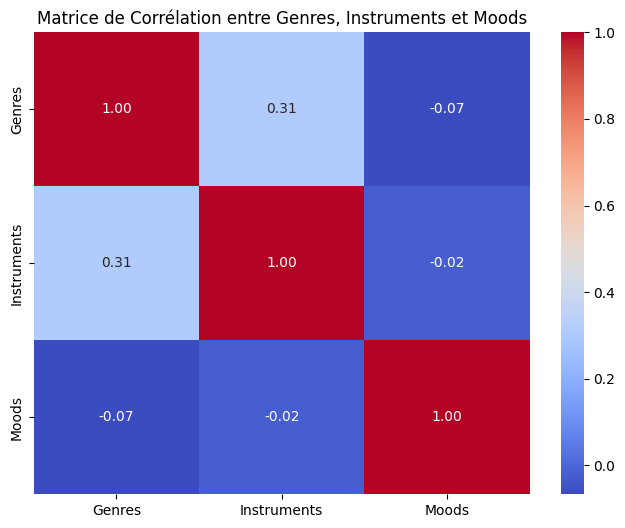

In [40]:
# Calcul des moyennes des tags par type
aggregated_data = pd.DataFrame({
    "Genres": input_data[tag_genres_cols].mean(axis=1),
    "Instruments": input_data[tag_instruments_cols].mean(axis=1),
    "Moods": input_data[tag_moods_cols].mean(axis=1),
})

# Matrice de corrélation
correlation_matrix = aggregated_data.corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)
plt.title("Matrice de Corrélation entre Genres, Instruments et Moods")
plt.show()
